In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

## Comparing randomly undersampling on different dataset

In [30]:
results = {
    'condmat': pd.read_csv('results/condmat_2_random_results.csv').set_index('ratio'),
    'mit': pd.read_csv('results/mit_2_random_results.csv').set_index('ratio'),
    'prosper_loans': pd.read_csv('results/prosper-loans_2_random_results.csv').set_index('ratio'),
    'topology': pd.read_csv('results/topology_2_random_results.csv').set_index('ratio'),
    'twitter': pd.read_csv('results/munmun_twitterex_ut_3_random_results.csv').set_index('ratio')
}

In [55]:
def plot_metrics(results_dict, metrics, titles=None):
    fig, axs = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 3))
    if titles is None:
        titles = [metrics[i] for i in range(len(metrics))]
    
    if len(metrics) == 1:
        axs = [axs]
    
    for i in range(len(metrics)):
        axs[i].set_title(titles[i])
        for dataset, res in results_dict.items():
            values = res.loc[res.index >= 0.2, metrics[i]]
            axs[i].plot(values.index, values.values, label=dataset)
        axs[i].set_xlabel('Class ratio')
        axs[i].set_ylabel('Value')
        if i == len(metrics) - 1:
            handles, labels = axs[i].get_legend_handles_labels()

    fig.legend(handles, labels)
    plt.show()

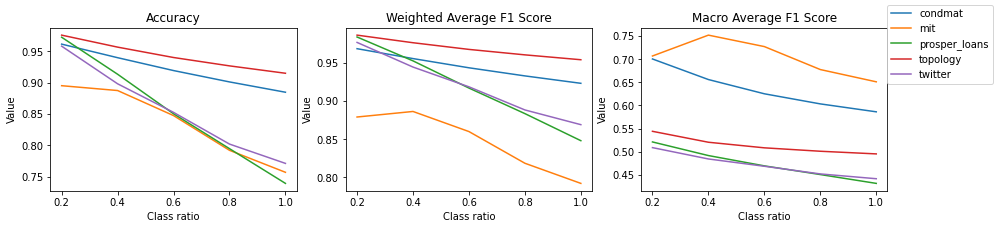

In [56]:
plot_metrics(results, 
    ['accuracy', 'weighted avg f1', 'macro avg f1'], 
    ['Accuracy', 'Weighted Average F1 Score', 'Macro Average F1 Score'])

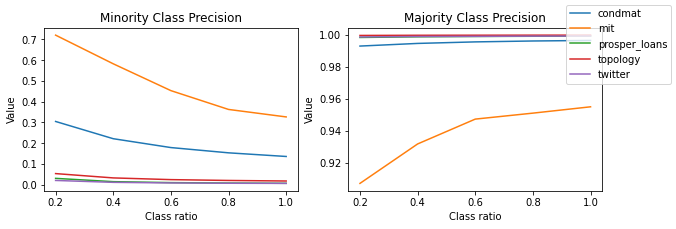

In [57]:
plot_metrics(results, 
    ['minority precision', 'majority precision'], 
    ['Minority Class Precision', 'Majority Class Precision'])

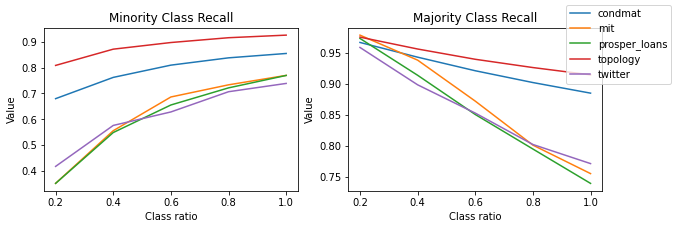

In [58]:
plot_metrics(results, 
    ['minority recall', 'majority recall'], 
    ['Minority Class Recall', 'Majority Class Recall'])

In [76]:
def get_metric_table(results_dict, metric):
    table = pd.DataFrame(columns=[0.2, 0.4, 0.6, 0.8, 1.0])
    for dataset, res in results_dict.items():
        values = res.loc[res.index >= 0.2, metric]
        table.loc[dataset] = values.values
    return table

In [77]:
get_metric_table(results, 'accuracy')

,0.2,0.4,0.6,0.8,1.0
condmat,0.961210,0.939616,0.919126,0.901041,0.884625
mit,0.895031,0.887334,0.847446,0.792162,0.757173
prosper_loans,0.972167,0.913277,0.850309,0.794795,0.739512
topology,0.975523,0.956429,0.939900,0.926590,0.914833
twitter,0.957960,0.898067,0.852566,0.802098,0.771355


In [82]:
results['condmat']["fpr"] = results['condmat']["fpr"].map(eval)
results['condmat']["tpr"] = results['condmat']["tpr"].map(eval)

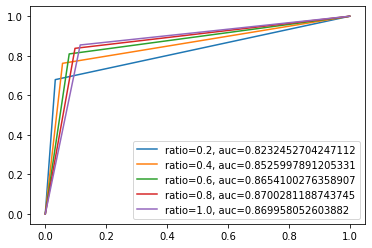

In [89]:
for ratio in [0.2, 0.4, 0.6, 0.8, 1.0]:
    plt.plot(
        results['condmat']['fpr'][ratio], results['condmat']['tpr'][ratio], 
        label=f'ratio={ratio}, auc={results["condmat"]["auc"][ratio]}')
plt.legend()
plt.show()

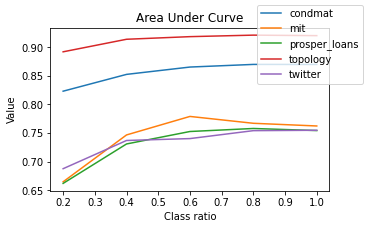

In [91]:
plot_metrics(results, ['auc'], ['Area Under Curve'])

## Comparing randomly undersampling on different neighborhoods

In [70]:
results_condmat = {
    'n = 2': pd.read_csv('results/condmat_2_random_results.csv').set_index('ratio'),
    'n = 3': pd.read_csv('results/condmat_3_random_results.csv').set_index('ratio'),
    'n = 4': pd.read_csv('results/condmat_4_random_results.csv').set_index('ratio')
}

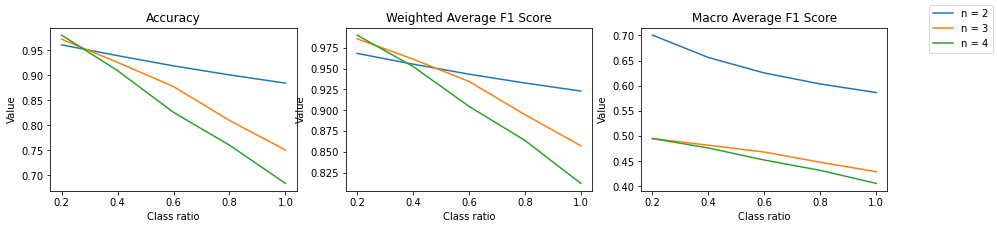

In [71]:
plot_metrics(results_condmat,
    ['accuracy', 'weighted avg f1', 'macro avg f1'], 
    ['Accuracy', 'Weighted Average F1 Score', 'Macro Average F1 Score'])

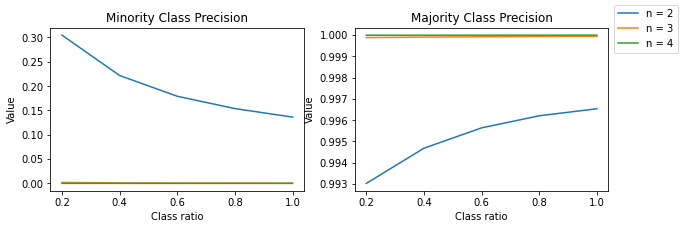

In [72]:
plot_metrics(results_condmat, 
    ['minority precision', 'majority precision'], 
    ['Minority Class Precision', 'Majority Class Precision'])

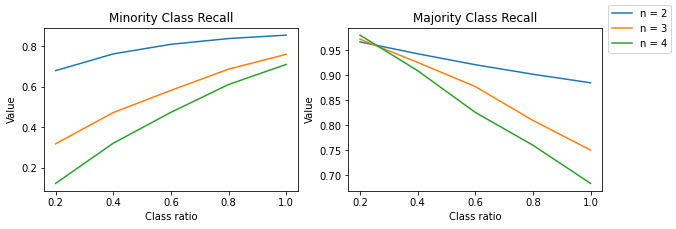

In [73]:
plot_metrics(results_condmat, 
    ['minority recall', 'majority recall'], 
    ['Minority Class Recall', 'Majority Class Recall'])

In [78]:
get_metric_table(results_condmat, 'accuracy')

,0.2,0.4,0.6,0.8,1.0
n = 2,0.961210,0.939616,0.919126,0.901041,0.884625
n = 3,0.972578,0.926100,0.877610,0.809759,0.750375
n = 4,0.980740,0.909545,0.825940,0.760150,0.683607


## Comparing undersampling techniques

In [66]:
results_condmat2 = {
    'random': pd.read_csv('results/condmat_2_random_results.csv').set_index('ratio'),
    'nearmiss1': pd.read_csv('results/condmat_2_nearmiss1_results.csv').set_index('ratio'),
    #'nearmiss2': pd.read_csv('results/condmat_2_nearmiss2_results.csv').set_index('ratio'),
    'nearmiss3': pd.read_csv('results/condmat_2_nearmiss3_results.csv').set_index('ratio'),
}

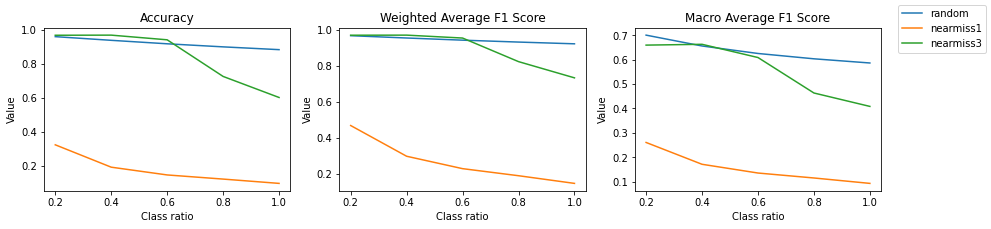

In [67]:
plot_metrics(results_condmat2,
    ['accuracy', 'weighted avg f1', 'macro avg f1'],
    ['Accuracy', 'Weighted Average F1 Score', 'Macro Average F1 Score'])

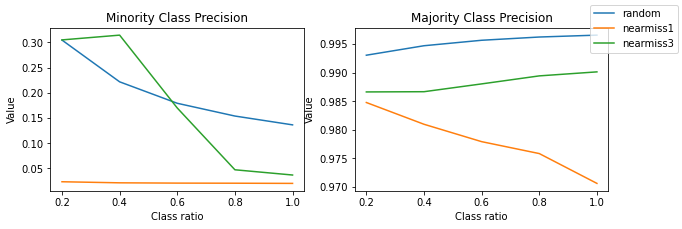

In [68]:
plot_metrics(results_condmat2,
    ['minority precision', 'majority precision'],
    ['Minority Class Precision', 'Majority Class Precision'])

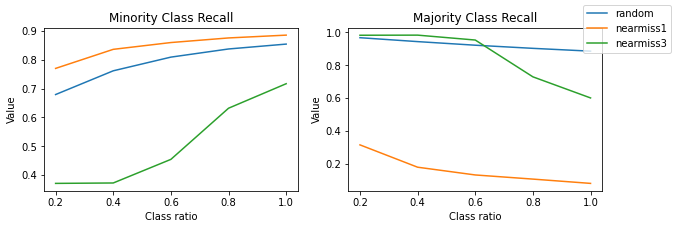

In [69]:
plot_metrics(results_condmat2,
    ['minority recall', 'majority recall'],
    ['Minority Class Recall', 'Majority Class Recall'])

In [79]:
get_metric_table(results_condmat2, 'accuracy')

,0.2,0.4,0.6,0.8,1.0
random,0.961210,0.939616,0.919126,0.901041,0.884625
nearmiss1,0.323944,0.192121,0.146386,0.121997,0.096631
nearmiss3,0.969438,0.970163,0.942625,0.726806,0.602754
